## Exploratory Data Analysis on US Visa Prediction 

### Life cycle of Machine learning Project

1. **Understanding the Problem Statement** – Define the objective and success criteria clearly.

2. **Data Collection** – Gather relevant data from various sources.

3. **Exploratory Data Analysis (EDA)** – Understand patterns, trends, and anomalies in the data.

4. **Data Cleaning** – Remove inconsistencies, errors, and irrelevant information.

5. **Data Preprocessing** – Transform data into a format suitable for modeling.

6. **Model Training** – Feed processed data into algorithms to learn patterns.

7. **Model Prediction** – Use the trained model to make accurate forecasts or classifications.

### About

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

### **1. Problem statement**

- OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.

- As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

**In this project we are going to use the data given to build a Classification model:**

- This model is to check if a Visa gets approved or not based on the given dataset.

- This can be used to recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

### **2. Data Collection**

- The Dataset is part of Office of Foreign Labor Certification (OFLC)

- The data consists of 25480 Rows and 12 Columns

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Importing the CSV file as pandas DataFrame

df = pd.read_csv("dataset/Visa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
# Number of rows and columns

df.shape

(25480, 12)

In [4]:
# Summary Statistics of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [5]:
# Datatypes in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### **3. Exploratory Data Analysis**

In [6]:
# Numerical and Categorical columns

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"We have {len(numerical_features)} numerical features : {numerical_features}")

print(f"We have {len(categorical_features)} numerical features : {categorical_features}")

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
We have 9 numerical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [7]:
# Proportion of count data on categorical features

for column in categorical_features:
    print(df[column].value_counts(normalize = True) * 100)
    print('---------------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
---------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
---------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
---------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
---------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---------------------------
region_of_employment
Northeast    2

**Insights**

- `case_id` have unique vlaues for each column which can be dropped as it it of no importance

- `continent` column is highly biased towards asia. Hence we can combine other categories to form a single category.

- `unit_of_wage` seems to be an important column as most of them are yearly contracts.


### Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

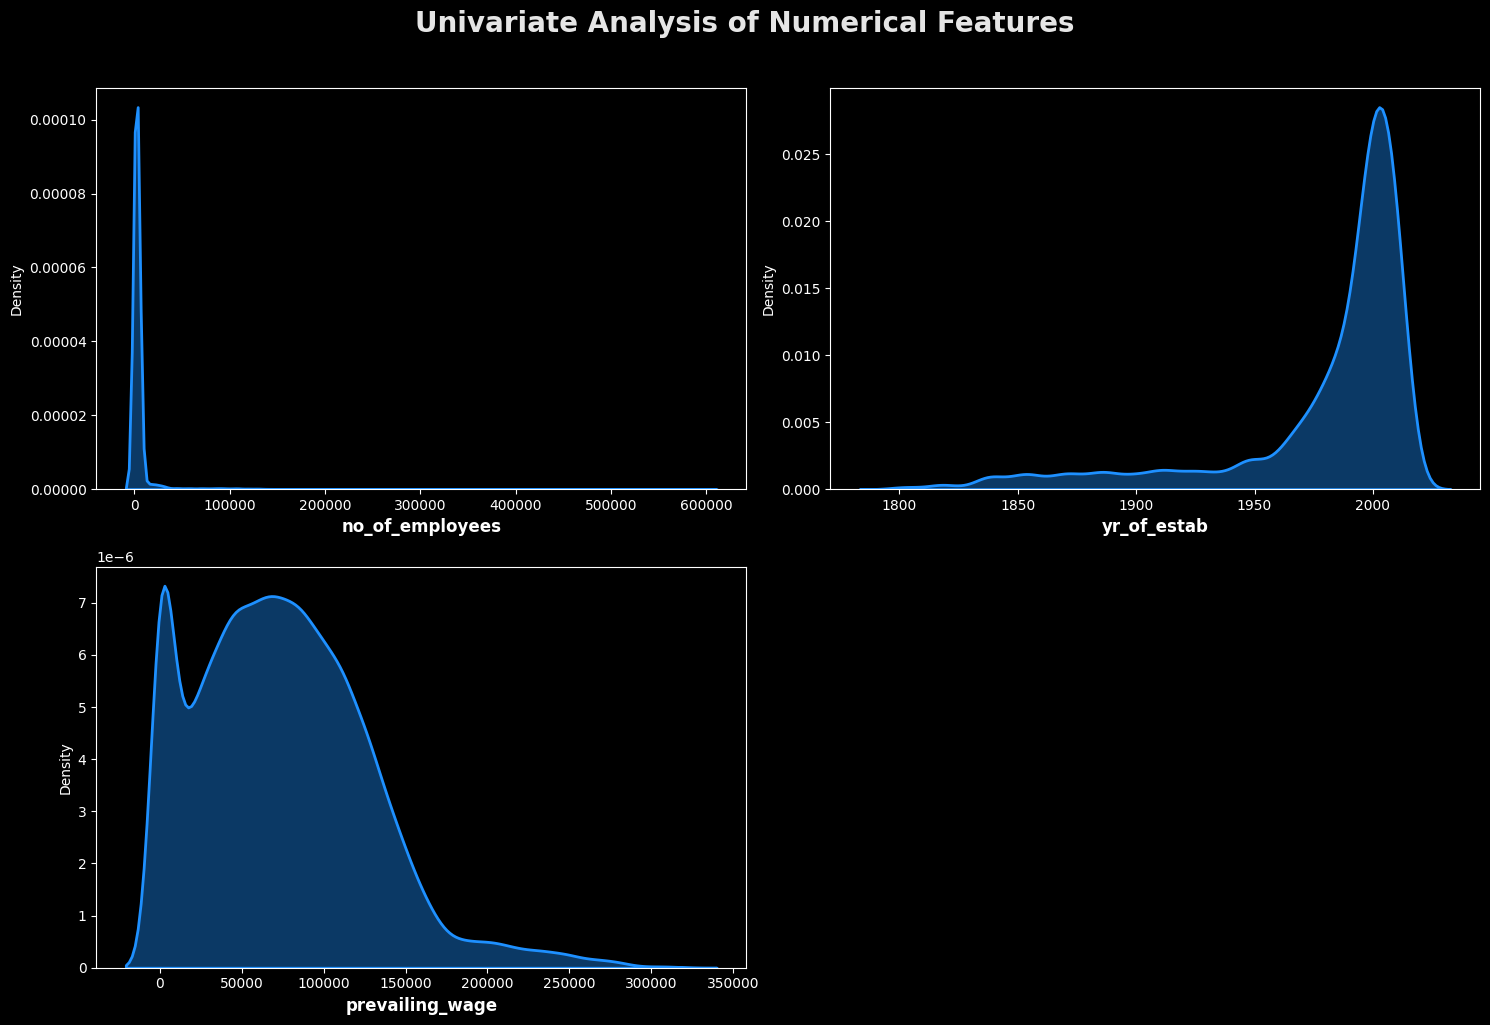

In [8]:
# Univariate Analysis of Numerical Features 

plt.style.use('dark_background')

plt.figure(figsize=(15, 10))
plt.suptitle(
    'Univariate Analysis of Numerical Features', fontsize = 20, fontweight = 'bold', color = 'white', alpha = 0.9, y = 1.02)

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)

    # KDE plot in dark blue
    sns.kdeplot(
        x = df[feature], color = "#1E90FF", fill = True, alpha = 0.4, linewidth = 2)

    # Axis styling
    plt.xlabel(feature, fontsize = 12, fontweight = 'bold', color = 'white')
    plt.ylabel('Density', fontsize = 10, color = 'white')
    plt.tick_params(colors = 'white')

    plt.tight_layout()

plt.show()


**Insights**

- `no_of_employees` column looks more skewed but it may be because of outliers.

- `yr_of_estab` is a discrete feature.

- `privailing-wage` is a right-skewed distribution.

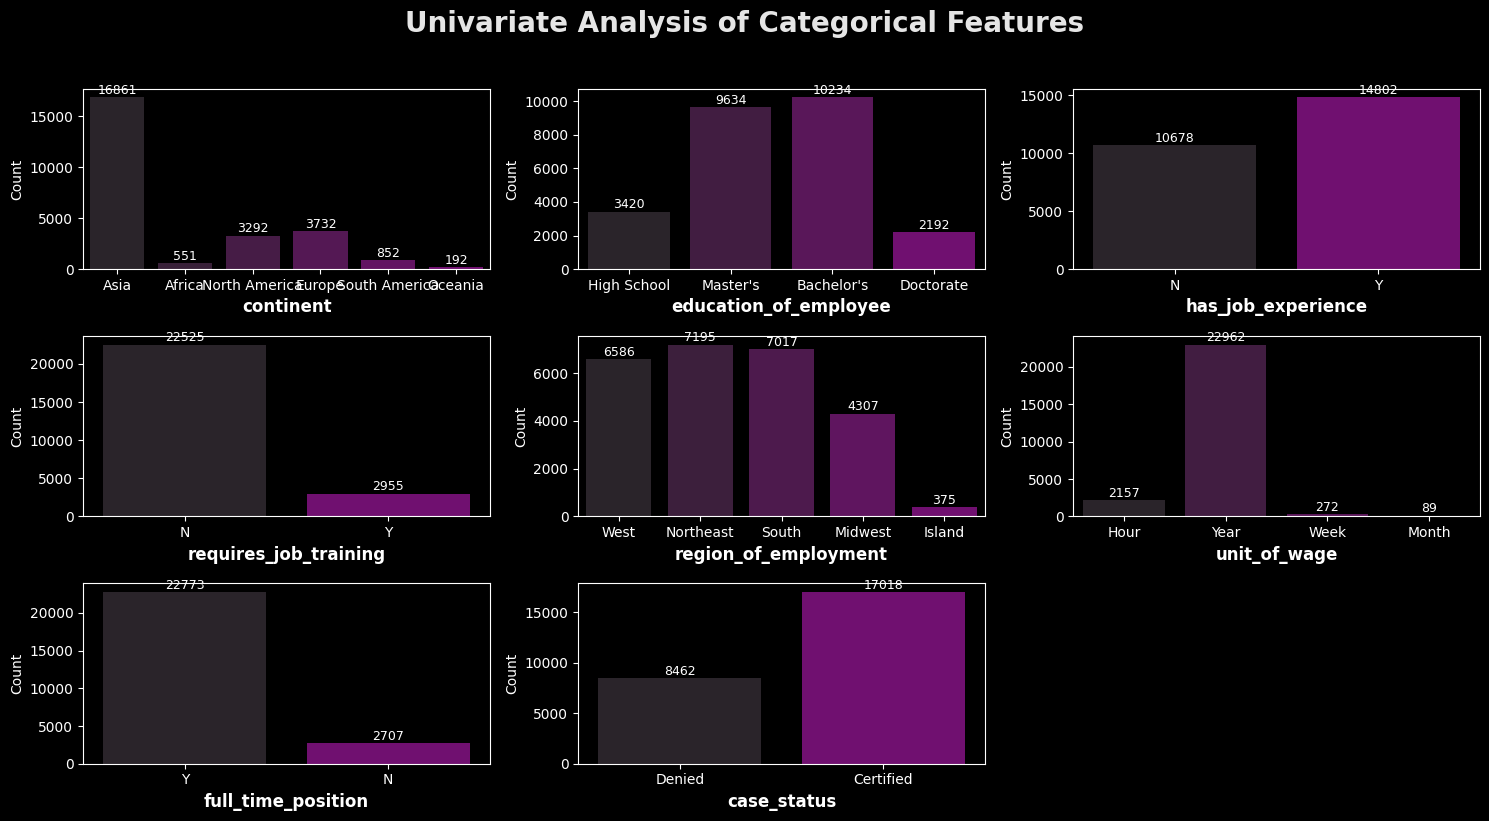

In [9]:
# Univariate Analysis on Categorical Features

# Remove unnecessary ID column
if 'case_id' in categorical_features:
    categorical_features.remove('case_id')

# Dark theme styling
plt.style.use('dark_background')

plt.figure(figsize=(15, 8))
plt.suptitle(
    'Univariate Analysis of Categorical Features', fontsize = 20, fontweight = 'bold', color = 'white', alpha = 0.9, y = 1.02)

for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)

    # Multiple dark-purple shades for each feature
    unique_vals = df[feature].nunique()
    palette = sns.color_palette("dark:purple", unique_vals)

    # Count plot
    ax = sns.countplot(x = df[feature], palette=palette)

    # Axis labels & ticks in white
    ax.set_xlabel(feature, fontsize = 12, fontweight = 'bold', color = 'white')
    ax.set_ylabel('Count', fontsize = 10, color = 'white')
    ax.tick_params(colors='white')

    # Add value labels above bars
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va = 'center',
            fontsize = 9, color = 'white', xytext = (0, 5),
            textcoords='offset points'
        )

    plt.tight_layout()
plt.show()


**Insights**

- `requires_job_training`, `unit_of_wage`, `full_time_position` and `continent` coulmns have signle category dominating.

- In rest of the columns are balanced.

### Multivariate Analysis

Multivariate analysis is the analysis of two or more variables to determine relationships between them. It is used to understand how multiple variables interact with each other and how they affect the outcome of interest.

In [10]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) <= 25]

continuous_features = [feature for feature in numerical_features if len(df[feature].unique()) > 25]

print(f"We have {len(discrete_features)} discrete features : {discrete_features}")

print(f"We have {len(continuous_features)} continuous features : {continuous_features}")


We have 0 discrete features : []
We have 3 continuous features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


### Correlation

`Correlation` is a statistical measure that describes the extent to which two variables are related. It indicates the strength and direction of a linear relationship between two variables.

### Multicollinearity

`Multicollinearity` in statistics refers to a situation where two or more independent variables in a regression model are highly correlated with each other, meaning they are not truly independent. This high correlation can cause issues in regression analysis, making it difficult to isolate the individual effects of each predictor on the dependent variable. 

In [11]:
# Check Multicollinearity in Numerical features

df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


No multicollinearity between the features.

- A **chi-squared test (also chi-square or χ2 test)** is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test.

- A **chi-square statistic** is one way to show relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e case_status.

Null Hypothesis (H0): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (H1): The Feature and Target column are not independent (Correalted)

In [12]:
# Check Multicollinearity in Categorical features

from scipy.stats import chi2_contingency
chi2_test = []

for feature in categorical_features:
    
    # chi2_contingency returns 4 values: (chi2_statistic, p_value, dof, expected_frequencies), [1] picks the p-value.
    # If p_value < 0.05: Reject H₀, There is a statistical relationship between the feature and case_status.
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        # pd.crosstab() Builds a cross-tabulation table (like a pivot table) showing counts for each combination of case_status (target) and the current feature.
        chi2_test.append('Reject Null Hypothesis')
    else:
        # Fail to reject H₀ → No significant relationship.
        chi2_test.append('Fail to Reject Null Hypothesis')

result = pd.DataFrame(data = [categorical_features, chi2_test]).T
result.columns = ['Feature', 'Hypothesis Result']
result

,Feature,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


**Insights**

- Here `requires_job_training` fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

In [13]:
# Checking Null Values

df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

### Continuous Features Distribution

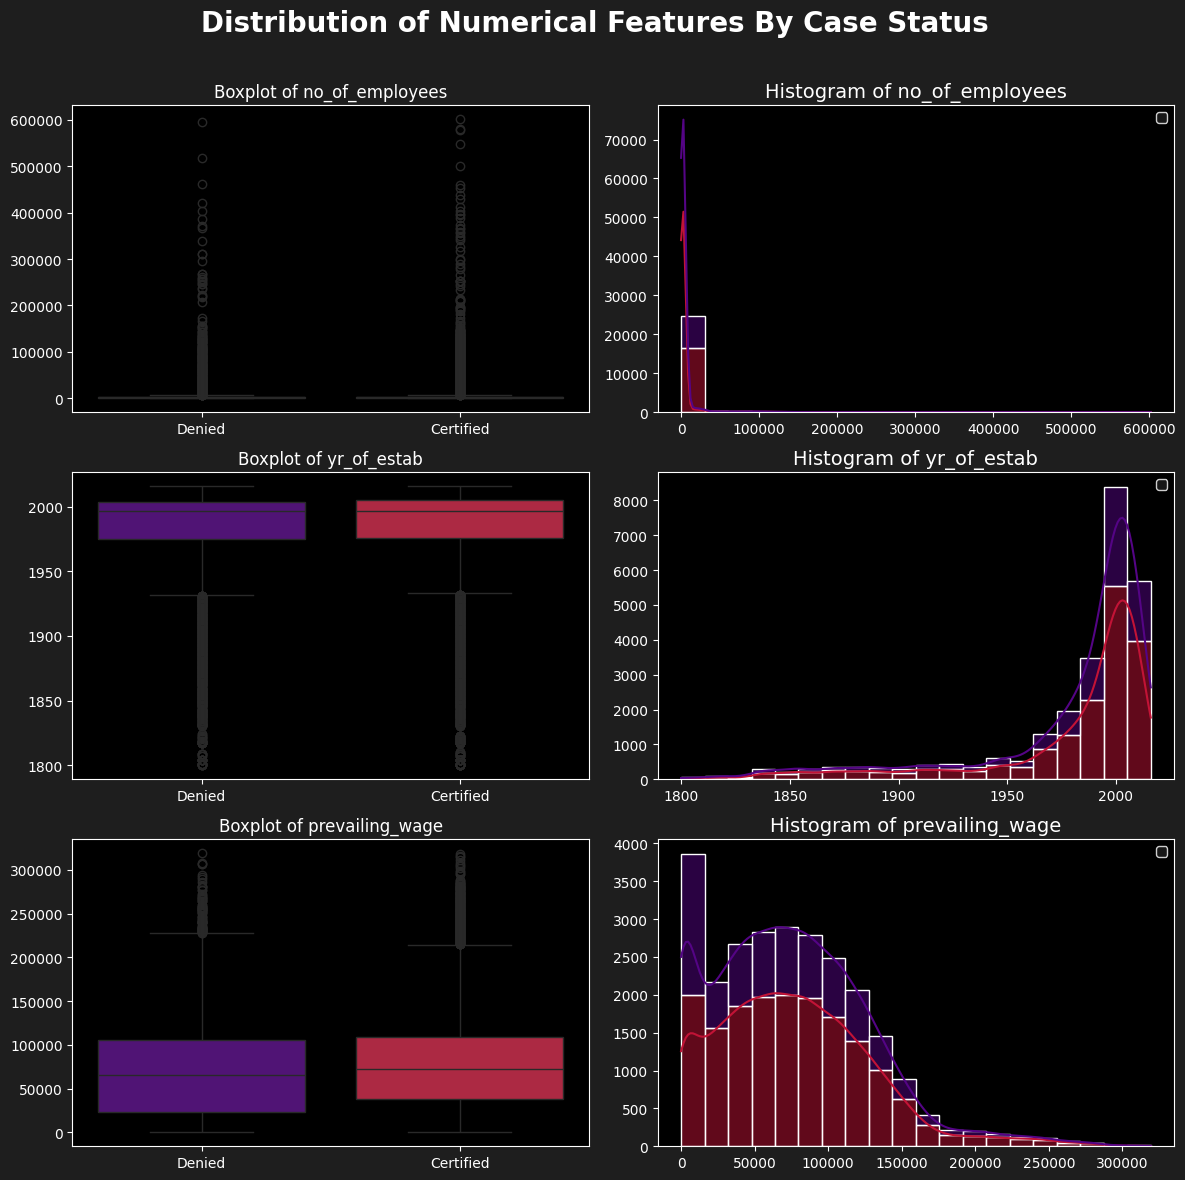

In [31]:
# Distribution of Continuous features

colors = ["#540485", "#C21336"]
plt.style.use('dark_background')

fig, ax = plt.subplots(3, 2, figsize = (12,12))
fig.patch.set_facecolor('#1e1e1e')  # dark background for figure
fig.suptitle('Distribution of Numerical Features By Case Status', color = 'white', fontsize = 20, fontweight = 'bold', ha = 'center')

for i, col in enumerate(continuous_features):
    # Boxplot
    sns.boxplot(data = df, x = 'case_status', y = col, palette = colors, ax = ax[i, 0])
    
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize = 12, color='white')
    ax[i, 0].set_xlabel('', color = 'white')
    ax[i, 0].set_ylabel('', color = 'white')
    ax[i, 0].tick_params(colors = 'white')

    # Histogram
    sns.histplot(data = df, x = col, hue = 'case_status', bins = 20, kde = True, multiple = 'stack', palette = colors, ax = ax[i, 1])
    ax[i, 1].set_title(f'Histogram of {col}', fontsize = 14, color = 'white')
    ax[i, 1].set_xlabel('', color = 'white')
    ax[i, 1].set_ylabel('', color = 'white')
    ax[i, 1].tick_params(colors = 'white')
    ax[i, 1].legend(facecolor = '#1e1e1e', edgecolor = 'white', labelcolor = 'white')

fig.tight_layout()
fig.subplots_adjust(top = 0.90)
plt.show()

### Initial Analysis Report

1. No of Employees has many outliers which can be handled in feature engineering and `no_of_employees` is Right Skewed.

2. `yr_of_estab` is left skewed and has some outliers below the lower bound of Box plot.

3. `prevailing_wage` is right skewed with outliers above upper bound of box plot.

4. There are no missing values in the dataset.

5. The `case_id` column can be dropped because each row has unique values.

6. The `case_status` column is the target column.


### **4. Data Visualization**

#### Visualizing the target feature

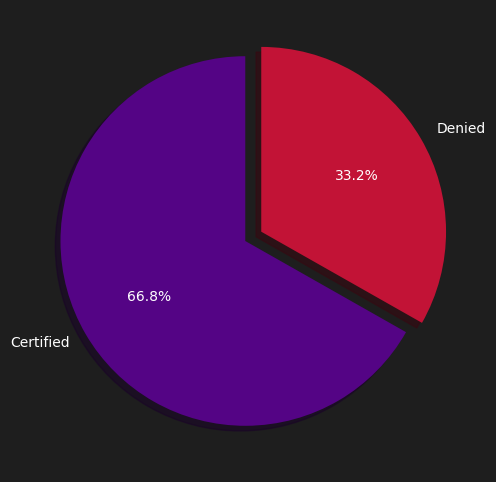

In [30]:
percentage = df.case_status.value_counts(normalize = True) * 100
labels = ["Certified", "Denied"] 

# Plotting PieChart using Ploty
fig, ax = plt.subplots(figsize = (10, 6))
explode = (0, 0.1)
colors = ["#540485", "#C21336"]
ax.pie(percentage, labels = labels, startangle = 90, autopct = '%1.1f%%', explode = explode, shadow = True, colors = colors, textprops = {'color': 'white'})

fig.patch.set_facecolor('#1e1e1e')
ax.set_facecolor('#1e1e1e')
plt.show()


From the chart it is seen that the target variable is `Imbalanced`. **What is imbalanced data?**

Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here Denied value has more count than the Certified value of the dataset.

#### Checking if Continent has any impact on Visa status 

In [16]:
# Grouping data by continent and their count of target column

df.groupby('continent')['case_status'].value_counts(normalize = True).to_frame() * 100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

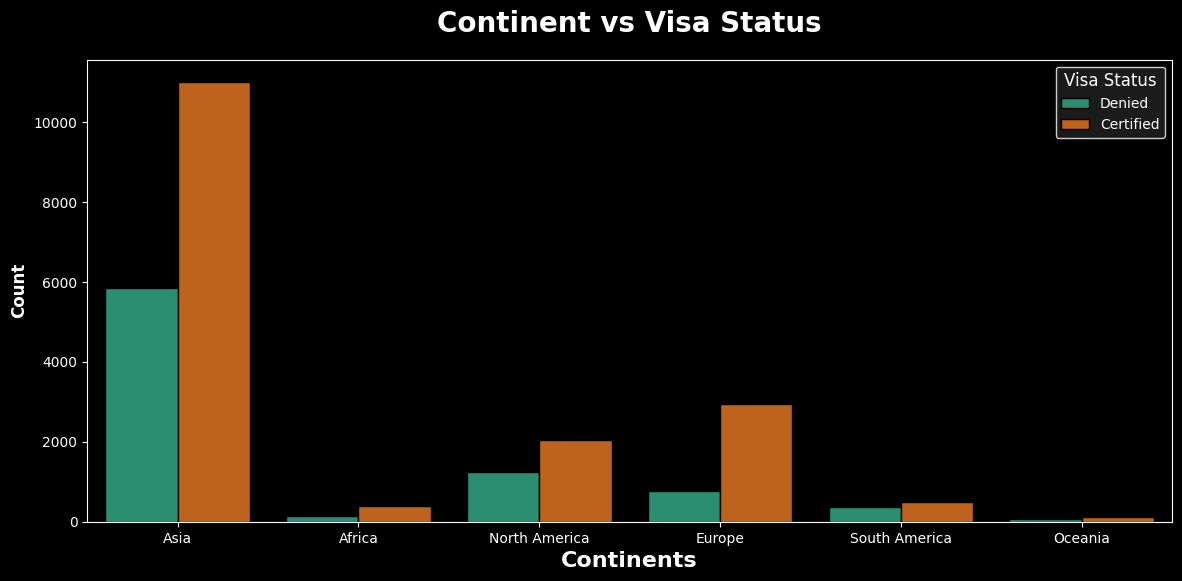

In [29]:
plt.style.use("dark_background")
plt.subplots(figsize  =(14, 6))
sns.countplot(x = "continent", hue = "case_status", data = df, ec = "black", palette = "Dark2")

plt.title("Continent vs Visa Status", weight = "bold", fontsize = 20, pad = 20, color = "white")
plt.ylabel("Count", weight = "bold", fontsize = 12, color = "white")
plt.xlabel("Continents", weight = "bold", fontsize = 16, color = "white")
plt.legend(title = "Visa Status", fancybox = True, facecolor = "#222", edgecolor = "white", title_fontsize = 12)
plt.show()


In [20]:
df_copy = df.copy()

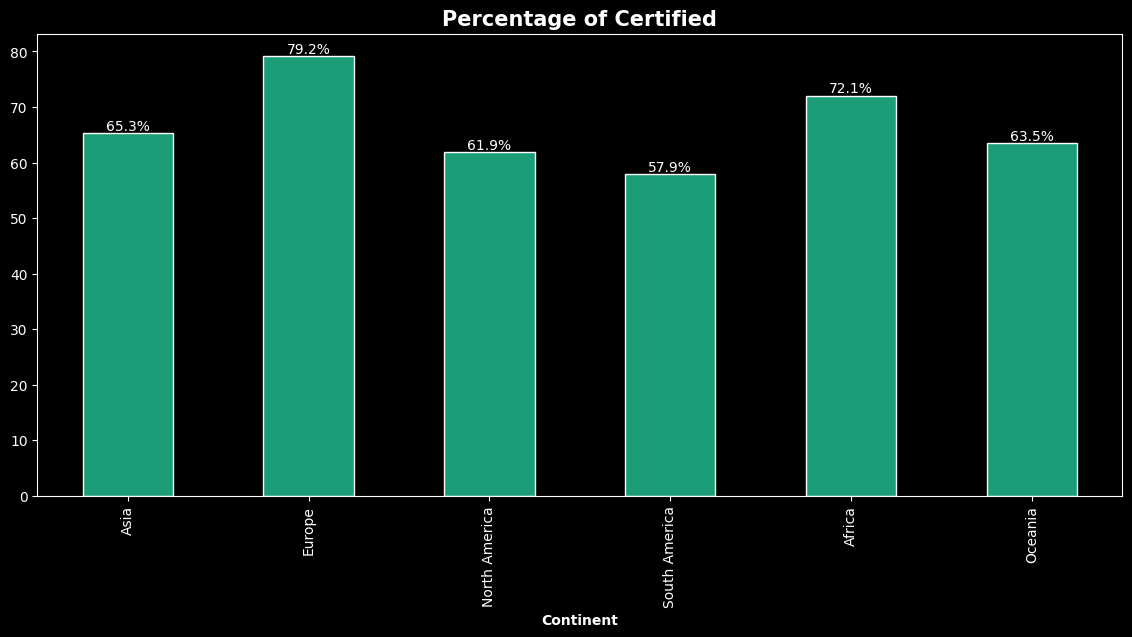

In [28]:
plt.style.use("dark_background")
plt.figure(figsize = (14, 6))

order = (
    100 * df_copy[df_copy["case_status"].isin(['Certified'])]['continent'].value_counts()
    / df_copy['continent'].value_counts())

order.plot(
    kind = 'bar',
    stacked = True,
    colormap = 'Dark2',
    edgecolor = "white"
)

plt.title("Percentage of Certified", fontsize = 15, fontweight = 'bold', color = "white")

# Adding percentage labels
for n in range(order.shape[0]):
    count = order[n]
    label = '{:0.1f}%'.format(count)
    plt.text(n, count + 0.5, label, ha = 'center', color = 'white', fontsize = 10)

plt.xlabel('Continent', fontweight = 'bold', color = "white")
plt.xticks(color = "white")
plt.yticks(color = "white")
plt.show()


**Insights**

- As per the Chart `Asia` applicants applied more than other continents.

- 43% of Certified applications are from `Asia`.

- This is followed by `Europe` with 11% of Certified applications.

- Highest chance of getting certified if you are from `Europe` and followed by `Africa`

#### Checking if education has any impact on Visa status

In [35]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

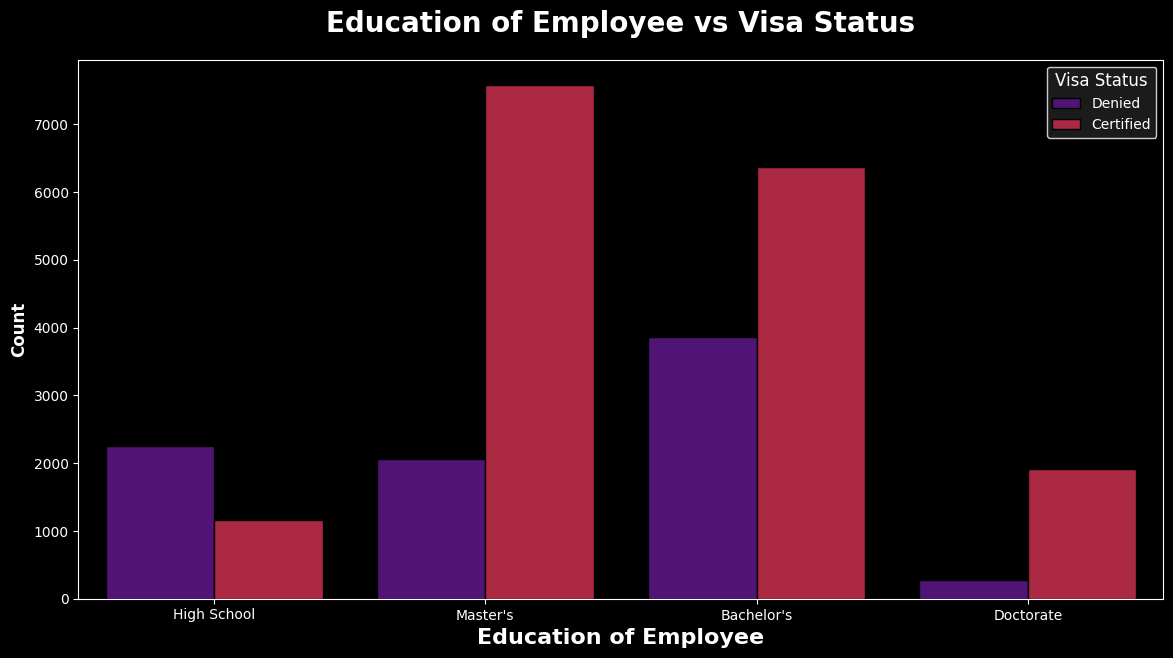

In [40]:
plt.style.use("dark_background")
colors = ["#540485", "#C21336"]

plt.subplots(figsize = (14, 7))
sns.countplot(x = "education_of_employee", hue = "case_status", data = df, ec = "black", palette = colors)

plt.title("Education of Employee vs Visa Status", weight = "bold", fontsize = 20, pad = 20, color = "white")

plt.ylabel("Count", weight = "bold", fontsize = 12, color = "white")

plt.xlabel("Education of Employee", weight = "bold", fontsize = 16, color = "white")

plt.legend(
    title = "Visa Status", fancybox = True, facecolor = "#222",edgecolor = "white", title_fontsize = 12)
plt.show()


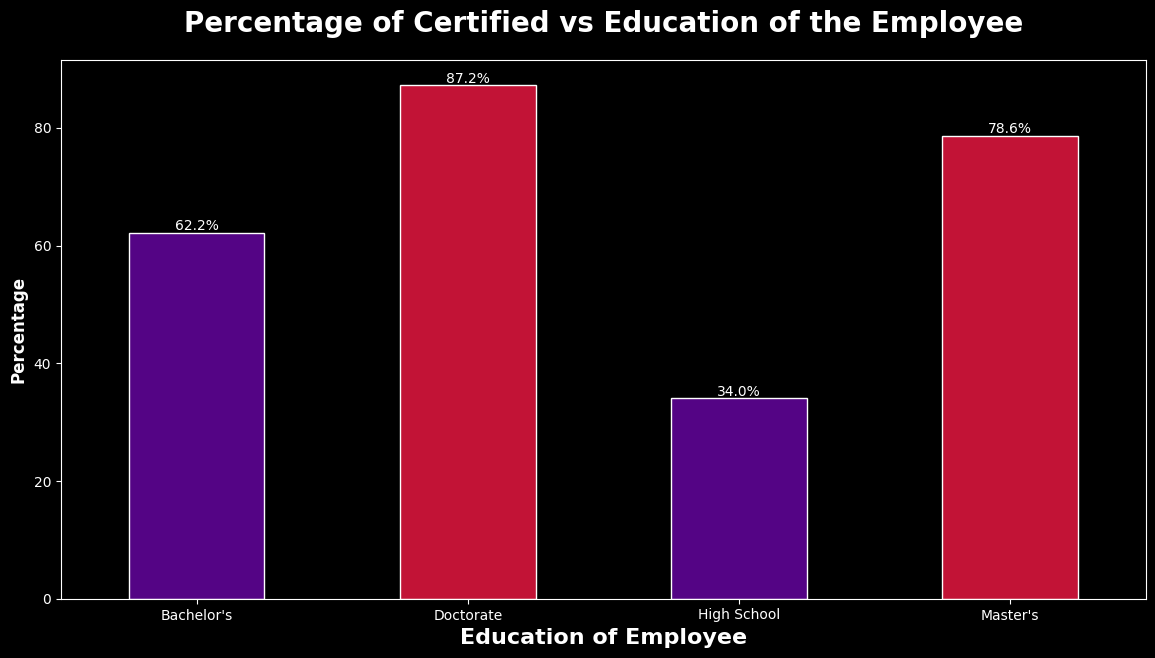

In [39]:
plt.style.use("dark_background")
colors = ["#540485", "#C21336"]
plt.figure(figsize = (14, 7))

# Compute percentage data
order = (
    100 * df_copy[df_copy["case_status"] == "Certified"]["education_of_employee"].value_counts()
    / df_copy["education_of_employee"].value_counts()
)

order.plot(kind = "bar", stacked = True, color = colors, edgecolor = "white")

plt.title("Percentage of Certified vs Education of the Employee", fontsize = 20, weight = "bold", pad = 20, color = "white")
plt.xlabel("Education of Employee", fontsize = 16, weight = "bold", color = "white")
plt.ylabel("Percentage", fontsize = 12, weight = "bold", color = "white")

# Data labels on bars
for n in range(order.shape[0]):
    count = order[n]
    label = f"{count:.1f}%"
    plt.text(n, count + 0.5, label, ha = "center", color = "white", fontsize = 10)


plt.xticks(rotation = 0, color = "white")
plt.yticks(color = "white")
plt.show()


**Insights**

- Education status has high impact

- `Doctorate` and `Master's` graduates have higher cange of being accepted then the others.

#### Checking applicant's previous work experience has any impact on Visa status

In [41]:
df.groupby('has_job_experience')['case_status'].value_counts(normalize = True).to_frame() * 100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

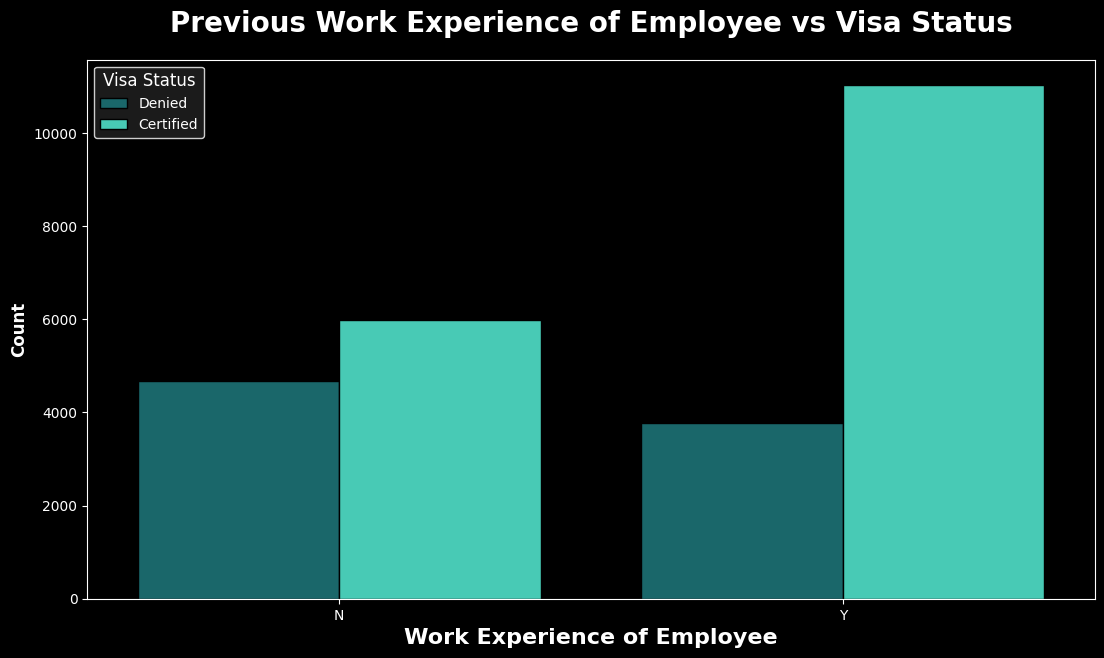

In [43]:
plt.style.use("dark_background")
colors = ["#0D7377", "#32E0C4"]
plt.subplots(figsize=(13, 7))

sns.countplot(x = "has_job_experience", hue = "case_status", data = df, ec = "black", palette = colors)


plt.title("Previous Work Experience of Employee vs Visa Status", weight = "bold", fontsize = 20, pad = 20, color = "white")
plt.ylabel("Count", weight = "bold", fontsize = 12, color = "white")
plt.xlabel("Work Experience of Employee", weight = "bold", fontsize = 16, color = "white")
plt.legend(title = "Visa Status", fancybox = True, facecolor = "#222", edgecolor = "white", title_fontsize = 12)

plt.show()

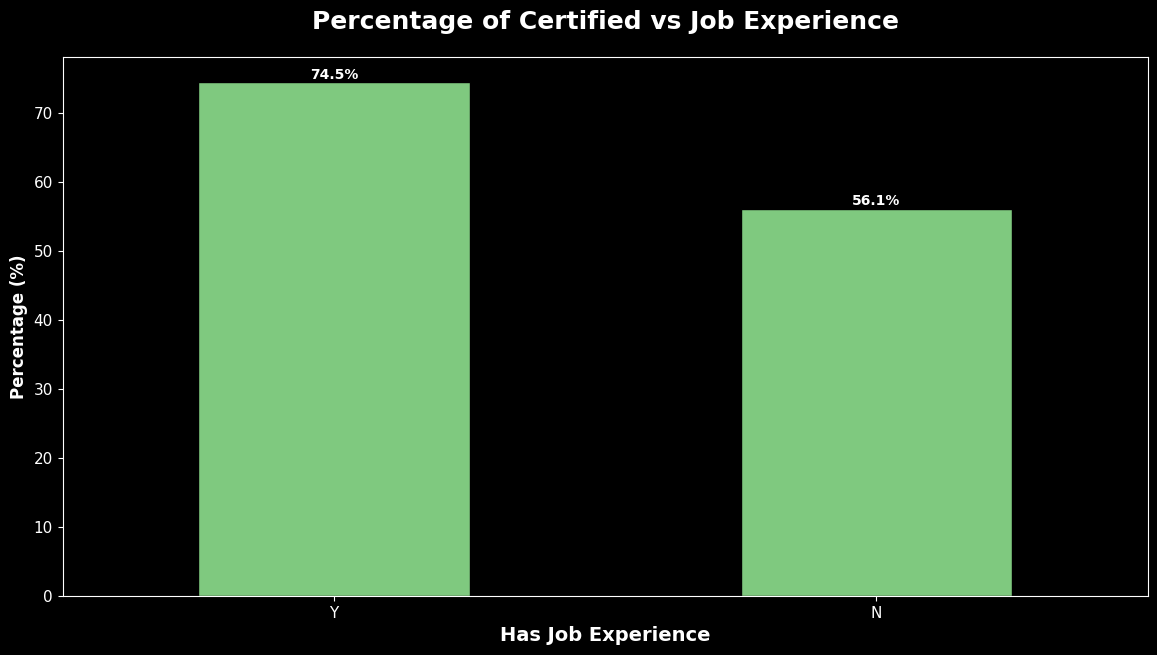

In [ ]:
plt.style.use("dark_background") 
plt.figure(figsize = (14, 7))

order = (100 * df_copy[df_copy["case_status"] == 'Certified']['has_job_experience'].value_counts()
          / df_copy['has_job_experience'].value_counts())

order.plot(kind = 'bar', stacked = True, colormap = 'Accent', edgecolor = "black")

plt.title("Percentage of Certified vs Job Experience", fontsize = 18, fontweight = 'bold', pad = 20, color = "white")
plt.xlabel('Has Job Experience', fontsize = 14, fontweight = 'bold', color = "white")
plt.ylabel('Percentage (%)', fontsize = 12, fontweight = 'bold', color = "white")

# Labels on bars
for n, count in enumerate(order):
    plt.text(n, count + 0.5, f"{count:.1f}%", ha=  'center', fontsize = 10, color = "white", fontweight = 'bold')

plt.xticks(rotation = 0, color="white", fontsize = 11)
plt.yticks(color = "white", fontsize = 11)
plt.show()


**Insights**

- People with previous work experience has been certified 74.5% only 25.5% applicant has been denied.

- People with no previous work experience has been certified 56% and denied 43%.

- There is a slight edge for the people with work experiences then the fresheres as expected. But the difference is not huge.